In [1]:
import xarray as xr
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from xgcm import Grid
import os
import zarr 
import dask
import regionmask

In [33]:
for i in range(24):
    first=2000+i
    os.system ('wget http://www.aoml.noaa.gov/phod/floridacurrent/FC_cable_transport_'+ '%s'%(first) +'.dat')

URL transformed to HTTPS due to an HSTS policy
--2023-10-27 13:12:03--  https://www.aoml.noaa.gov/phod/floridacurrent/FC_cable_transport_2000.dat
Resolving www.aoml.noaa.gov (www.aoml.noaa.gov)... 192.111.123.246
Connecting to www.aoml.noaa.gov (www.aoml.noaa.gov)|192.111.123.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14374 (14K)
Saving to: ‘FC_cable_transport_2000.dat’

     0K .......... ....                                       100% 78.7M=0s

2023-10-27 13:12:03 (78.7 MB/s) - ‘FC_cable_transport_2000.dat’ saved [14374/14374]

URL transformed to HTTPS due to an HSTS policy
--2023-10-27 13:12:03--  https://www.aoml.noaa.gov/phod/floridacurrent/FC_cable_transport_2001.dat
Resolving www.aoml.noaa.gov (www.aoml.noaa.gov)... 192.111.123.246
Connecting to www.aoml.noaa.gov (www.aoml.noaa.gov)|192.111.123.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14336 (14K)
Saving to: ‘FC_cable_transport_2001.dat’

     0K .......... .

HTTP request sent, awaiting response... 200 OK
Length: 14359 (14K)
Saving to: ‘FC_cable_transport_2014.dat’

     0K .......... ....                                       100% 71.9M=0s

2023-10-27 13:12:09 (71.9 MB/s) - ‘FC_cable_transport_2014.dat’ saved [14359/14359]

URL transformed to HTTPS due to an HSTS policy
--2023-10-27 13:12:09--  https://www.aoml.noaa.gov/phod/floridacurrent/FC_cable_transport_2015.dat
Resolving www.aoml.noaa.gov (www.aoml.noaa.gov)... 192.111.123.246
Connecting to www.aoml.noaa.gov (www.aoml.noaa.gov)|192.111.123.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14359 (14K)
Saving to: ‘FC_cable_transport_2015.dat’

     0K .......... ....                                       100% 70.3M=0s

2023-10-27 13:12:09 (70.3 MB/s) - ‘FC_cable_transport_2015.dat’ saved [14359/14359]

URL transformed to HTTPS due to an HSTS policy
--2023-10-27 13:12:09--  https://www.aoml.noaa.gov/phod/floridacurrent/FC_cable_transport_2016.dat
Resolving ww

In [2]:
data = []
for i in range(24):
    first=2000+i
    ds1=pd.read_csv('data/Cable_Data/FC_cable_transport_'+'%s'%(first)+'.dat',sep = '\s+', header = 35,names = ['Year','Month','Day','Transport','Flag'])
    data.append(ds1)
    ds = pd.concat(data, ignore_index=True)
    ds['date'] = pd.to_datetime(ds[['Year', 'Month', 'Day']])
    ds = ds.drop(columns=['Year', 'Month', 'Day'])
    dsx = ds.set_index('date').to_xarray()

In [7]:
dsx

<xarray.Dataset>
Dimensions:    (date: 8418)
Coordinates:
  * date       (date) datetime64[ns] 2000-01-17 2000-01-18 ... 2023-10-23
Data variables:
    Transport  (date) float64 nan nan nan nan nan ... 27.9 29.4 30.3 30.3 30.1
    Flag       (date) int64 2 2 2 2 2 2 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0 0 0 0 0

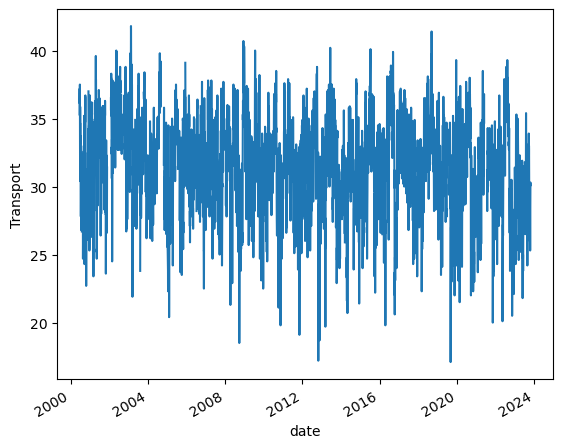

In [45]:
dsx.Transport.plot()

Text(0, 0.5, 'Transport_Anomaly')

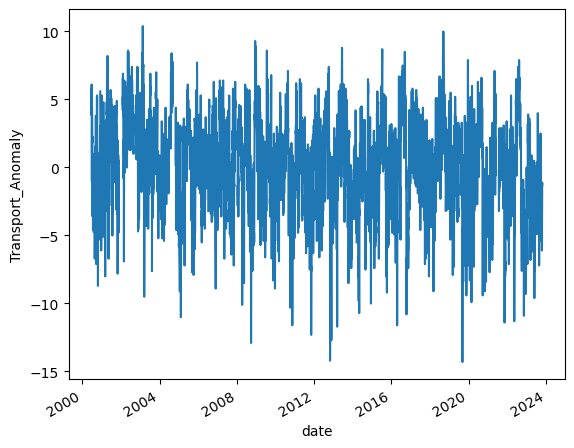

In [8]:
Tmean = dsx.Transport.mean()
Tanom = dsx.Transport-Tmean
Tanom.plot()
plt.ylabel('Transport_Anomaly')

In [15]:
Tanom.where(Tanom>0).dropna('date')

<xarray.DataArray 'Transport' (date: 4042)>
array([3.8918563, 5.5918563, 5.2918563, ..., 1.2918563, 1.5918563,
       1.2918563])
Coordinates:
  * date     (date) datetime64[ns] 2000-06-19 2000-06-20 ... 2023-09-26